In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pdf=pd.read_csv("homeprices_banglore.csv")

In [11]:
from sklearn import preprocessing

In [47]:
sx = preprocessing.MinMaxScaler()
x_scaled=sx.fit_transform(pdf.drop(["price"],axis=1))
sy = preprocessing.MinMaxScaler()


y_scaled = sy.fit_transform(pdf['price'].values.reshape(pdf.shape[0],1))




In [66]:
x_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [61]:
y_scaled.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [103]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=.01):
    number_of_features=x.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=x.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        y_predicted=np.dot(w,x.T)+b
        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad = -2*np.mean(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

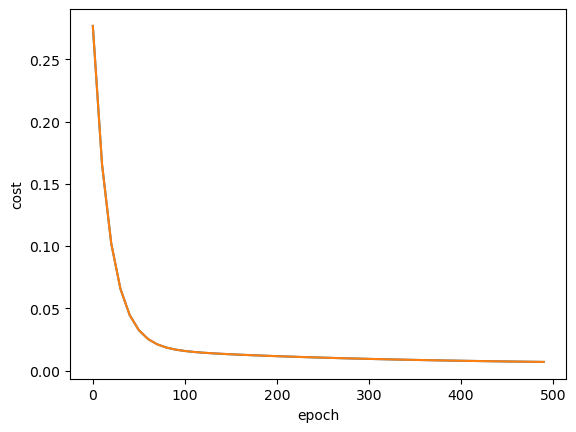

In [35]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
plt.show()

In [53]:
def predict(area, bedrooms, w, b):
    # Reshape input to 2D array as required by MinMaxScaler
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    # Equation for price
    scaled_pricexx = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    
    # Return the original scale of the price
    return sy.inverse_transform([[scaled_price]])[0][0]


In [64]:
predict(1000,2,w,b)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

#### Stochastic Gradient Descent Implementation

In [70]:
import random
random.randint(0,6)

6

In [77]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list


     
        

In [95]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd=stochastic_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),10000)

In [97]:
w

array([0.70712464, 0.67456527])

In [99]:
plt.close("all")

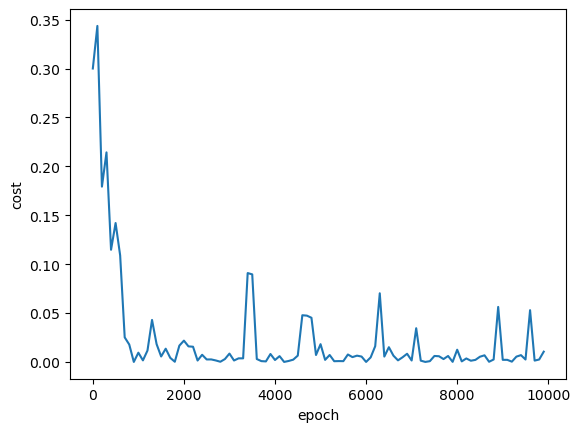

In [101]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()

#### Implementing mini batch gradient descent

In [ ]:
def mini_batch_gradient(x,y_true,epochs=100,batch_size=5,learning rate=.01):
    number_of_features=x.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=x.shape[0]
    if batch_size>total_samples:
        batch_size=total_samples
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        random_index=np.random.permutation(total_samples)
        x_tmp=x[random_index]
        y+tmp=y_true[random_index]
        for j in range(0,total_samples,batch_size):
            xj=x_tmp[j:j+batch_size]
            yj=y_tmp[j:j+batch_size]
            y_predicted=np.dot(w,xj.T)+b
            w_grad=-(2/len(xj))*(xj.T.dot(yj-y_predicted))
            b_grad=-(2/len(xj))*(np.sum(yj-y_predicted))
    